<a href="https://colab.research.google.com/github/Atanga-Theresa/Machine-Learning/blob/main/Employee_Retention_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Atanga Theresa Atampoka (WTF/2025/2963),  atangatheresa@outlook.com

The primary objective is to analyze employee data to understand and predict employee retention. This involves conducting exploratory data analysis to identify key variables that directly impact whether an employee leaves or stays with the company. Subsequently, visual insights are generated through bar charts illustrating the influence of employee salaries and department affiliations on retention rates. Finally, a logistic regression model is constructed using the identified impactful variables, and its accuracy measured to assess its predictive capability regarding employee turnover.

In [ ]:
# Importing relavant libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Employee_data = pd.read_csv("/content/drive/MyDrive/HR.csv")
Employee_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Exploratory Analysis to check if Data is Clean

In [ ]:
# Checking for null values
Employee_data.isnull().sum()
Employee_data.info()
Employee_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
#Checking for null values

Employee_data.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


In [ ]:
#Checking for duplicates
Employee_data.duplicated().sum()
print(Employee_data.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool


In [ ]:
# Confirm if duplicates are actual duplicates
Employee_data["is_duplicate"] = Employee_data.duplicated()
Employee_data[Employee_data["is_duplicate"] == True]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,is_duplicate
396,0.46,0.57,2,139,3,0,1,0,sales,low,True
866,0.41,0.46,2,128,3,0,1,0,accounting,low,True
1317,0.37,0.51,2,127,3,0,1,0,sales,medium,True
1368,0.41,0.52,2,132,3,0,1,0,RandD,low,True
1461,0.42,0.53,2,142,3,0,1,0,sales,low,True
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,True
14995,0.37,0.48,2,160,3,0,1,0,support,low,True
14996,0.37,0.53,2,143,3,0,1,0,support,low,True
14997,0.11,0.96,6,280,4,0,1,0,support,low,True


In [ ]:
#mark all duplicates as true
Employee_data["is_duplicate"] =Employee_data.duplicated(keep=False)

In [ ]:
# view rows marked as potential duplicates
Employee_data[Employee_data["is_duplicate"] == True]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,is_duplicate
396,0.46,0.57,2,139,3,0,1,0,sales,low,True
866,0.41,0.46,2,128,3,0,1,0,accounting,low,True
1317,0.37,0.51,2,127,3,0,1,0,sales,medium,True
1461,0.42,0.53,2,142,3,0,1,0,sales,low,True
1516,0.40,0.50,2,127,3,0,1,0,IT,low,True
...,...,...,...,...,...,...,...,...,...,...,...
14868,0.43,0.55,2,130,3,0,1,0,support,high,True
14869,0.38,0.53,2,146,3,0,1,0,support,low,True
14870,0.77,0.91,5,221,6,0,1,0,support,medium,True
14871,0.44,0.50,2,130,3,0,1,0,support,medium,True


### Handling Duplicates: Removing Duplicate Rows

To ensure the integrity of the dataset for analysis and model training,the identified duplicate rows are removed.

In [ ]:
# Drop duplicate rows, keeping the first occurrence
Employee_data_cleaned = Employee_data.drop_duplicates().copy()

In [ ]:
# Verify that duplicates have been removed
print(f"Number of duplicates after dropping: {Employee_data_cleaned.duplicated().sum()}")

Number of duplicates after dropping: 0


In [ ]:
# Display the shape of the cleaned DataFrame
print(f"Shape of the DataFrame after dropping duplicates: {Employee_data_cleaned.shape}")

Shape of the DataFrame after dropping duplicates: (12653, 11)


In [ ]:
# Removing the 'is_duplicate' column as it's no longer needed after handling duplicates
if 'is_duplicate' in Employee_data_cleaned.columns:
    Employee_data_cleaned = Employee_data_cleaned.drop(columns=['is_duplicate'])

Exploratory data analysis to determine which variables have direct and clear impact on employee retention

In [ ]:
Employee_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,is_duplicate
0,0.38,0.53,2,157,3,0,1,0,sales,low,False
1,0.80,0.86,5,262,6,0,1,0,sales,medium,False
2,0.11,0.88,7,272,4,0,1,0,sales,medium,False
3,0.72,0.87,5,223,5,0,1,0,sales,low,False
4,0.37,0.52,2,159,3,0,1,0,sales,low,False


In [ ]:
#1) Comparing Satisfaction Level vs Employee Leaving-Group employee satisfaction level based on the "left" column(0 =those that stayed and 1= those who left)
Employee_data_cleaned.groupby("left")["satisfaction_level"].mean()



,satisfaction_level
left,
0,0.667365
1,0.440633


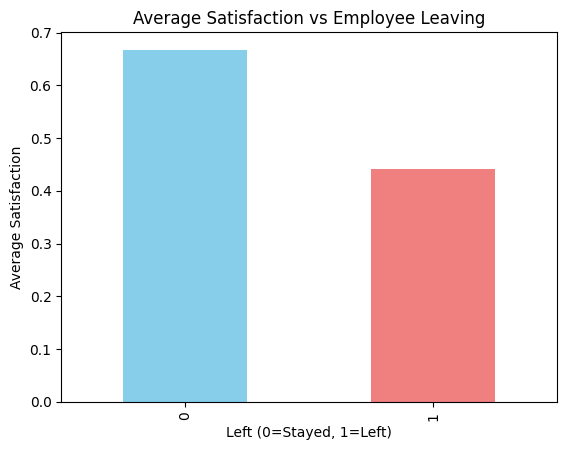

In [ ]:
Employee_data_cleaned.groupby("left")["satisfaction_level"].mean().plot(kind="bar", color=['skyblue', 'lightcoral'])
plt.xlabel("Left (0=Stayed, 1=Left)")
plt.ylabel("Average Satisfaction")
plt.title("Average Satisfaction vs Employee Leaving")
plt.show()

Based on the bar chart there's a clear impact of satisfaction level on employee leaving.

Employees who stayed(left = 0) have a higher average satisfaction level of approximately 0.667.
Employees who left (left = 1) have a significantly lower average satisfaction level of approximately 0.440, indicating that employees with lower satisfaction levels are more likely to leave the company, thus suggesting that satisfaction is a crucial factor in employee retention.

In [ ]:
#2)Comparing Average Monthly Hours vs Leaving
Employee_data_cleaned.groupby("left")["average_montly_hours"].mean()

,average_montly_hours
left,
0,198.942700
1,207.897475


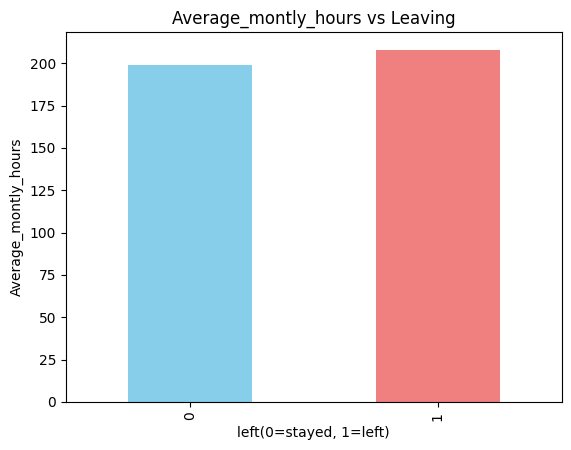

In [ ]:
Employee_data_cleaned.groupby("left")["average_montly_hours"].mean().plot(kind="bar", color=['skyblue', 'lightcoral'])
plt.xlabel("left(0=stayed, 1=left)")
plt.ylabel("Average_montly_hours")
plt.title("Average_montly_hours vs Leaving")
plt.show()

Based on the bar chart and the underlying data for average monthly hours, Employees who stayed (left = 0) worked an average of approximately 198.94 hours per month.
Employees who left (left = 1) worked a slightly higher average of approximately 207.90 hours per month.
This indicates that employees who ultimately left the company tended to work slightly more hours on average than those who stayed. While the difference isn't as pronounced as with satisfaction level, it suggests that higher average monthly hours might be a contributing factor to employees deciding to leave.

In [ ]:
#3)Time Spent in Company vs Leaving
Employee_data_cleaned.groupby("left")["time_spend_company"].mean()

,time_spend_company
left,
0,3.262000
1,3.881266


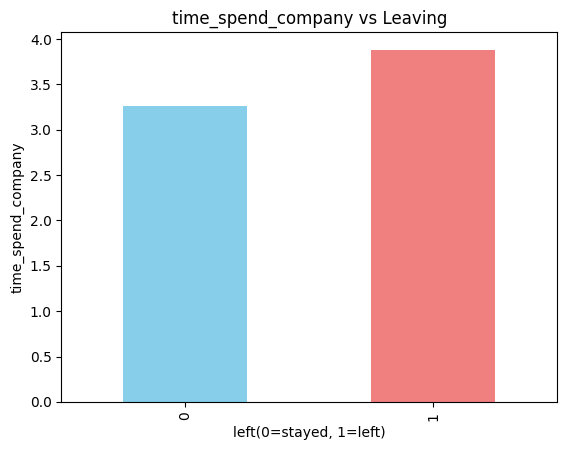

In [ ]:
Employee_data_cleaned.groupby("left")["time_spend_company"].mean().plot(kind="bar", color=['skyblue', 'lightcoral'])
plt.xlabel("left(0=stayed, 1=left)")
plt.ylabel("time_spend_company")
plt.title("time_spend_company vs Leaving")
plt.show()

Based on the bar chart and the underlying data for 'time_spend_company', Employees who stayed (left = 0) spent an average of approximately 3.26 years in the company.
Employees who left (left = 1) spent a slightly longer average of approximately 3.88 years in the company.
This suggests that employees who eventually leave the company tend to have spent a bit more time with the company on average compared to those who stay. This could indicate that employees might be leaving after a certain tenure, possibly due to career progression desires, lack of promotion, or other factors that accumulate over time.



In [ ]:
#4)Salary Level vs Leaving
Employee_data_cleaned.groupby("left")["salary"].value_counts()

left  salary
0     low       4566
      medium    4492
      high       942
1     low       1597
      medium     994
      high        62
Name: count, dtype: int64

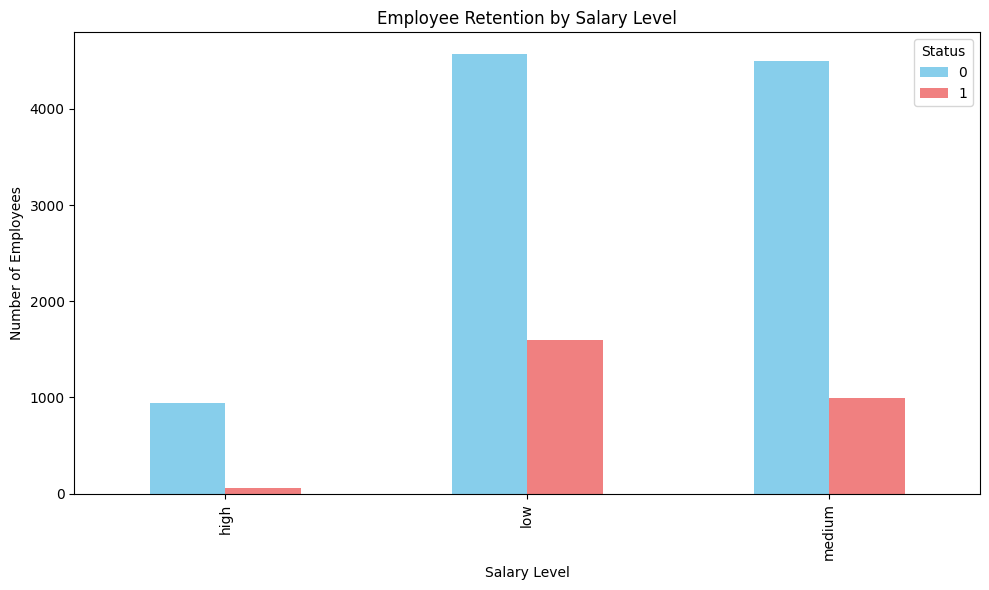

In [ ]:
#Plotting Salary vs Leaving
salary_counts = Employee_data_cleaned.groupby("left")["salary"].value_counts().unstack(level=0)
salary_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.title('Employee Retention by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

Based on the bar chart titled 'Employee Retention by Salary Level',
A significant number of employees with low salaries tend to leave the company (represented by the 'Left' bars being notably high compared to 'Stayed' bars in this category).
Medium Salary: Fewer employees with medium salaries leave compared to those with low salaries. The proportion of employees who stayed is considerably higher than those who left in this category.
High Salary: Very few employees with high salaries leave the company. This category shows the strongest retention, with the 'Stayed' bar being much larger than the 'Left' bar.
In summary, the output indicates a strong inverse correlation between salary level and employee turnover: employees with higher salaries are significantly more likely to stay with the company, while those with lower salaries have a higher tendency to leave.

In [ ]:
# Promotion vs Leaving

pd.crosstab(Employee_data_cleaned["promotion_last_5years"], Employee_data_cleaned["left"], normalize="index")


left,0,1
promotion_last_5years,,
0,0.787867,0.212133
1,0.937500,0.062500


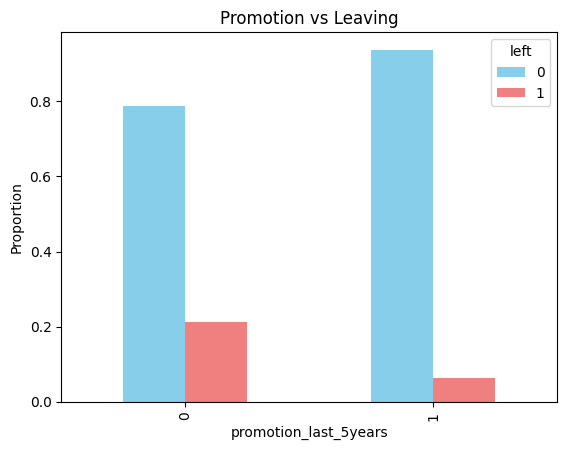

In [ ]:
#Plotting Promotion vs Leaving
pd.crosstab(Employee_data_cleaned["promotion_last_5years"], Employee_data_cleaned["left"], normalize="index").plot(kind="bar", color=['skyblue', 'lightcoral'])
plt.title("Promotion vs Leaving")
plt.ylabel("Proportion")
plt.show()

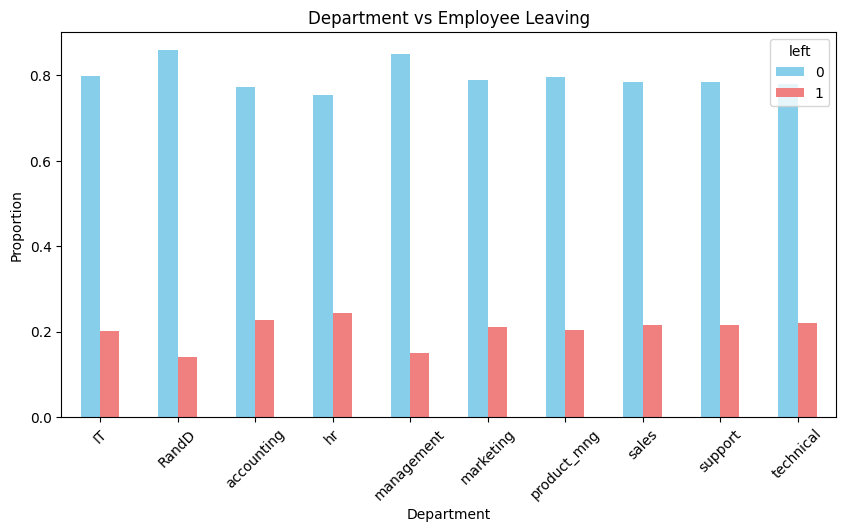

In [ ]:
# Plotting Department vs Leaving
pd.crosstab(Employee_data_cleaned["Department"], Employee_data_cleaned["left"], normalize="index").plot(kind="bar", figsize=(10,5), color=['skyblue', 'lightcoral'])
plt.title("Department vs Employee Leaving")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.show()

Some departments, such as sales, technical, and support, appear to have a higher proportion of employees leaving (the '1' bar is more significant relative to the '0' bar) compared to others.
Departments like management and RandD show a much lower proportion of employees leaving, indicating better retention.
There's a clear variation in retention rates across different departments, suggesting that departmental affiliation plays a role in whether an employee stays or leaves the company.

Visualizing Correlation Matrix

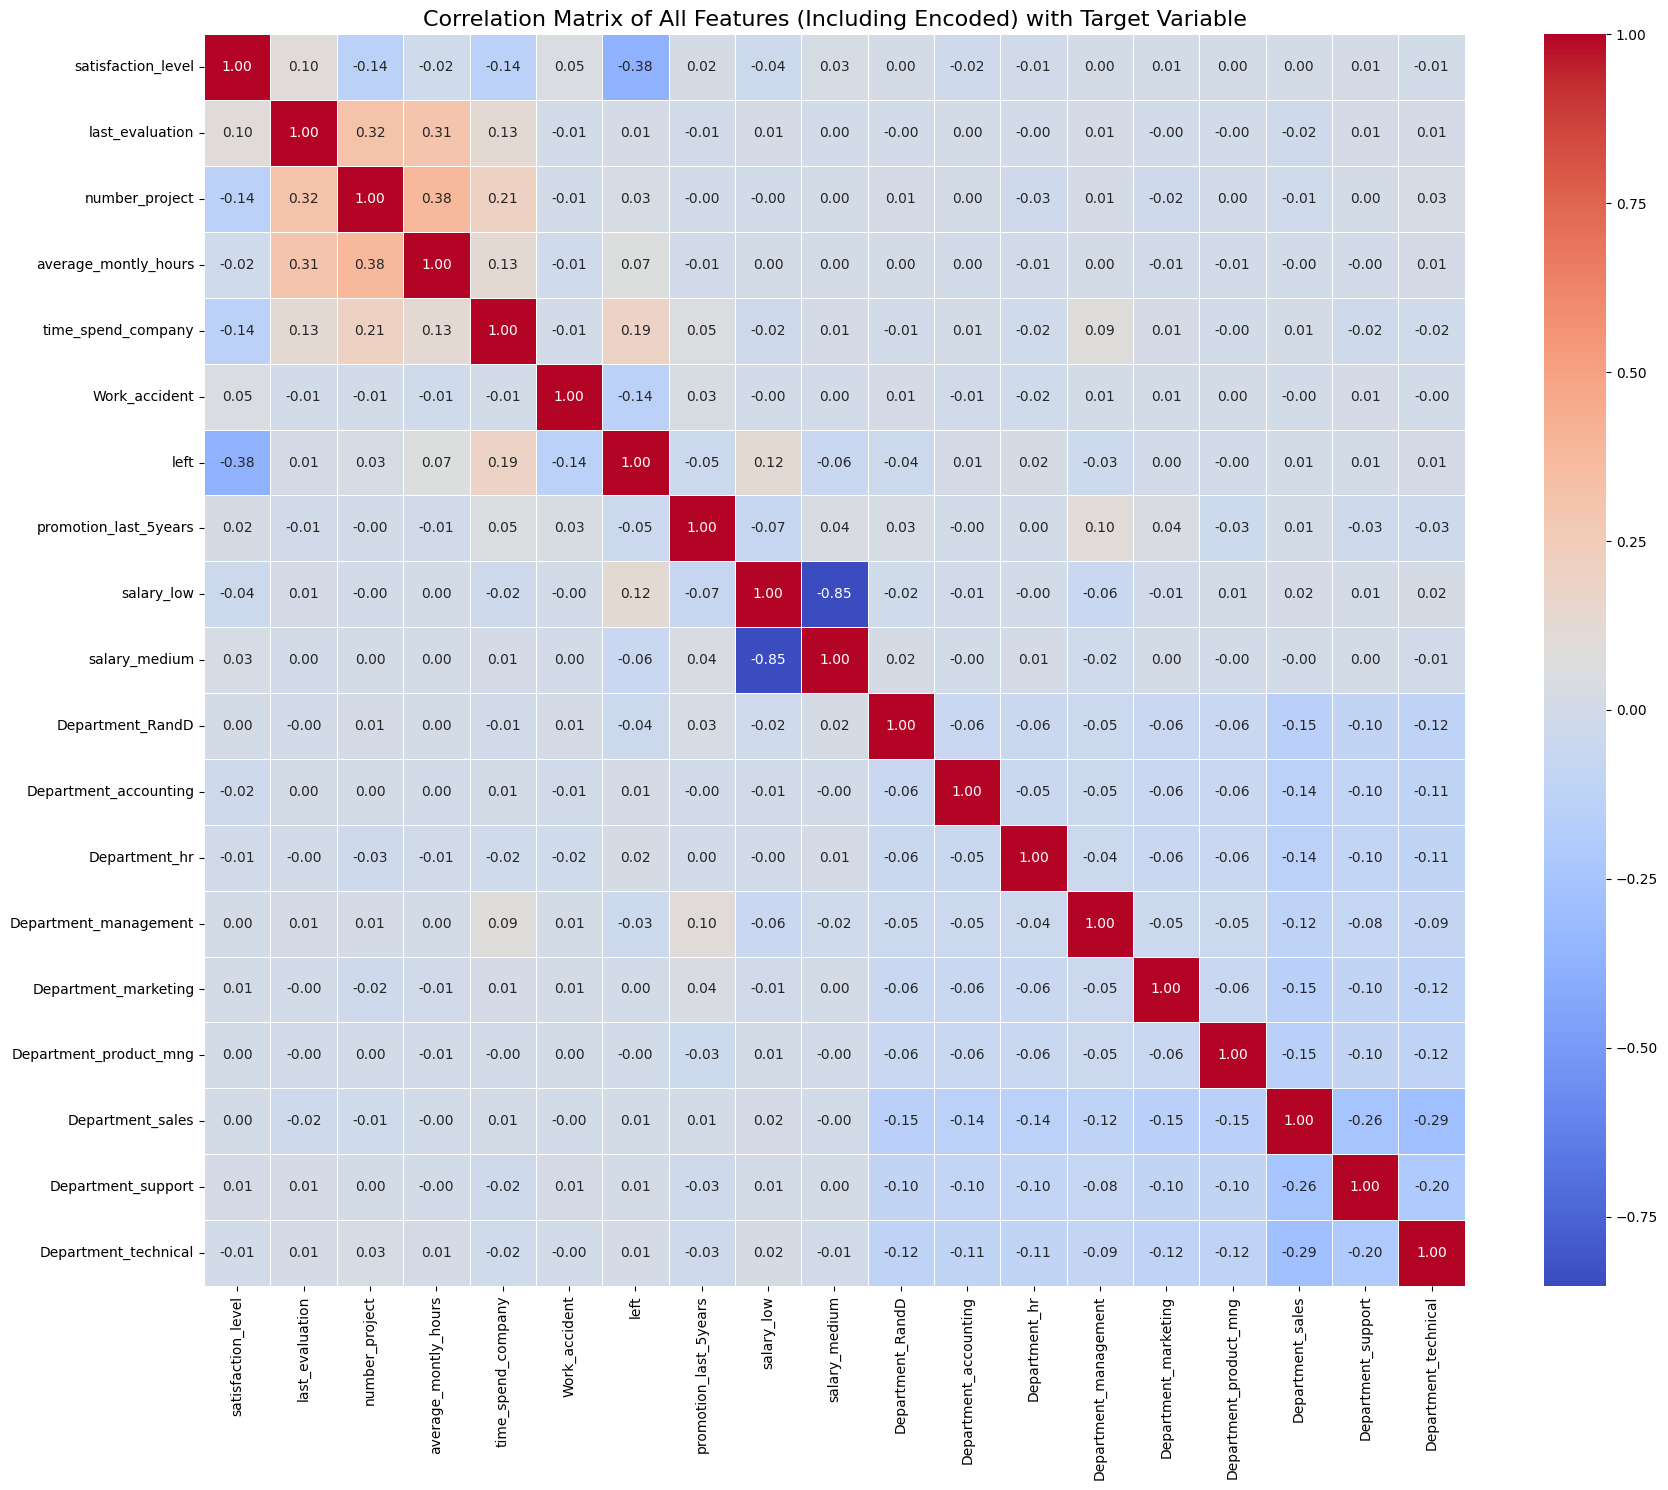

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the encoded DataFrame
correlation_matrix = Employee_data_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 15))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Features (Including Encoded) with Target Variable', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

This heatmap shows the correlation coefficients between all pairs of variables in our Employee_data_encoded DataFrame. You can observe the correlation of each feature with the left column to understand its linear relationship with employee turnover. Positive values indicate a positive correlation, negative values indicate a negative correlation, and values closer to 1 or -1 suggest stronger relationships.

### Encoding Categorical Variables: 'salary' and 'Department'

In [ ]:
# Perform one-hot encoding for 'salary' and 'Department' columns
Employee_data_encoded = pd.get_dummies(Employee_data_cleaned, columns=['salary', 'Department'], drop_first=True)

In [ ]:
# Display the first few rows of the DataFrame with encoded variables
display(Employee_data_encoded.head())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_low,salary_medium,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,True,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,False,True,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,False,True,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,True,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,True,False,False,False,False,False,False,False,True,False,False


### Building the Logistic Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Define features (X) and target (y)- where 'left' is our target variable, all other columns are features
X = Employee_data_encoded.drop('left', axis=1)
y = Employee_data_encoded['left']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
# Initialize and train the Logistic Regression model- 'liblinear' is good for small datasets and handles L1/L2 penalties
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


In [ ]:
#Measure the accuracy of the model
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.7921496311907271
[[2824  183]
 [ 606  183]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      3007
           1       0.50      0.23      0.32       789

    accuracy                           0.79      3796
   macro avg       0.66      0.59      0.60      3796
weighted avg       0.76      0.79      0.76      3796



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob = model.predict_proba(X_test)[:,1]
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

ROC-AUC: 0.8285129374931244


The ROC-AUC score of 0.8285 indicates that the logistic regression model effectively distinguishes between employees likely to leave and those likely to stay. A score of 0.5 means random classification, while 1.0 indicates a perfect classifier. Thus, 0.8285 shows the model ranks employees who leave higher than those who stay..